## Stochastic Gradient Descent 
### code from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
x,y = load_diabetes(return_X_y=True)

In [3]:
x.shape, y.shape

((442, 10), (442,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
print("r2 SCore: ", r2_score(y_test, pred))

r2 SCore:  0.4526027629719197


In [6]:
print('reg.coef_: ',reg.coef_)
print('reg.intercept_: ',reg.intercept_)

reg.coef_:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
reg.intercept_:  151.34560453985995


In [10]:
class MySGDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coeff = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, x_train, y_train):
        self.intercept = 0
        # since we dont know the number of coefficient in advanced
        # Then, how can we get the number of coeff???
        # using x_train ---> # of columns
        self.coeff = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            # This loop run for n rows
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                
                y_hat = np.dot(x_train[idx], self.coeff) + self.intercept
                # y_hat gives a scalar quantity
                
                # calculate derivative for single value, 
                intercept_der = -2*(y_train[idx]-y_hat)
                
                self.intercept = self.intercept - (self.learning_rate*intercept_der)
                
                coeff_der = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coeff = self.coeff - (self.learning_rate * coeff_der)
                
        print("self.intercept: ", self.intercept)
        print("self.coeff: ", self.coeff)
        
        pass
    
    def predict(self, x_test):
        return np.dot(x_test, self.coeff) + self.intercept
        pass

In [25]:
my_sgd = MySGDRegressor(epochs=50, learning_rate=0.01)

In [26]:
my_sgd.fit(x_train, y_train)
# reg.coef_:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
#   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
# reg.intercept_:  151.34560453985995


self.intercept:  151.4841501042558
self.coeff:  [  50.09739546  -99.36295456  367.58597356  254.53612229   -8.05685762
  -43.54974223 -180.89663576  142.35844328  283.88694685  152.40351877]


In [27]:
y_pred = my_sgd.predict(x_test)

In [28]:
r2_score(y_test, y_pred)

0.44824134429904405

In [32]:
class OurGDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coeff = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, x_train, y_train):
        self.intercept = 0
        # since we dont know the number of coefficient in advanced
        # Then, how can we get the number of coeff???
        # using x_train ---> # of columns
        self.coeff = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(x_train, self.coeff) + self.intercept
            
            intercept_derivative = -2 * np.mean(y_train - y_hat)
            self.intercept = self.intercept - (self.learning_rate*intercept_derivative)
            
            # Now calculate all new coeff
            coeff_dr = -2 * np.dot((y_train - y_hat),x_train)/x_train.shape[0]
            self.coeff = self.coeff - (self.learning_rate * coeff_dr)
        print("self.intercept: ", self.intercept)
        print("self.coeff: ", self.coeff)
        
        pass
    
    def predict(self, x_test):
        return np.dot(x_test, self.coeff) + self.intercept
        pass

In [ ]:
gdr = OurGDRegressor(epochs=250, learning_rate=0.9)
gdr.fit(x_train, y_train)
myPred = gdr.predict(x_test)
print("r2 Score: ", r2_score(y_test, myPred))

self.intercept:  151.6953714928009
self.coeff:  [  54.77752712 -118.26736836  403.54075107  273.34870362  -18.21174397
  -59.84591126 -193.73469406  149.40985715  310.94234121  147.05496686]
r2 Score:  0.4540465542132718


Comparing Speed/Time of Batch and Stochasitc Gradient

In [29]:
import time

Stochastic GD

In [ ]:
start = time.time()
my_sgd.fit(x_train, y_train)
print('The time taken is', time.time()-start)

self.intercept:  153.5423629492601
self.coeff:  [  60.02851678  -97.04938737  367.37535493  247.55115592   -5.92702954
  -43.01139606 -184.77976631  143.39312569  288.593647    151.12301947]
The time taken is 0.5400984287261963


Batch GD

In [34]:
start = time.time()
myPred = gdr.predict(x_test)
print('The time taken is', time.time()-start)


The time taken is 0.0010068416595458984


### **Stochastic GD using scikit learn SGDRegressor class**

In [36]:
from sklearn.linear_model import SGDRegressor
# max_iter = epochs

> learning_rate is a strategy, not a numeric value.

`In SGDRegressor, the learning_rate parameter is a string that defines how the actual learning rate (eta0) changes during training.`

✅ eta0 is the initial learning rate — and it's a number.
___
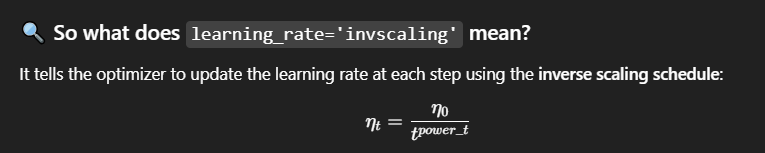

In [37]:
sgd_regressor = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.01)

### 📘 **What is a Learning Schedule in Stochastic Gradient Descent (SGD)?**

In **Stochastic Gradient Descent (SGD)**, a **learning schedule** (also called a **learning rate schedule**) is a strategy for adjusting the **learning rate** (`α` or `η`) over time during training.

---

## 🔍 Why is a Learning Schedule Needed?

In SGD:

- The updates are noisy (since only one or a few samples are used per step).
- A **high learning rate** helps explore faster but may overshoot.
- A **low learning rate** helps converge more precisely but may get stuck or slow down training.

**So, the idea is:**

- Start with a **higher learning rate**.
- Gradually **reduce it** to fine-tune the model during training.

---

## 📈 Common Learning Schedules

### ✅ 1. Step Decay
Decrease the learning rate every few epochs:


---

### ✅ 2. Time-Based Decay
Learning rate decays gradually over time:


---

### ✅ 3. Exponential Decay
Decay the learning rate exponentially with time:


---

### ✅ 4. 1/t Decay (Inverse Scaling)
Common in online learning:


---

### ✅ 5. Adaptive Methods (Adam, RMSprop)
These optimizers **dynamically adjust** the learning rate **per parameter** based on past gradients.

> ⚠️ While not technically "schedules," adaptive methods like **Adam** and **RMSprop** behave like one by modifying the learning rate during training.

---
